<a href="https://colab.research.google.com/github/AnupamaRajkumar/PyTorchTutorials/blob/main/DeepNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working with non-linear boundaries\
General steps are:
1. Feedforward network : predict all outputs
2. Cross entropy : Determine total error
3. Backpropagation to reduce the loss and improve prediction
4. Repeat the above steps at some learning rate to go on reducing the loss and 
for the model to converge

In [43]:
  !pip3 install torch

In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets

In [45]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
data = torch.Tensor(X)
label = torch.Tensor(y.reshape(500, 1))

In [46]:
def scatter_plot():
  plt.plot(X[y==0, 0], X[y==0, 1], 'bo')
  plt.plot(X[y==1, 0], X[y==1, 1], 'ro')

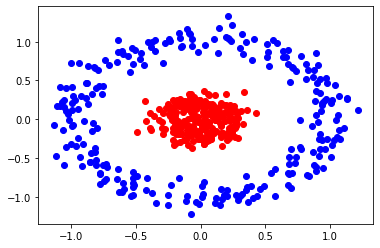

In [47]:
scatter_plot()

In [48]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)

  def forward(self, x):
    h = torch.sigmoid(self.linear(x))
    o = torch.sigmoid(self.linear2(h))
    return o

  def predict(self, x):
    pred = self.forward(x)
    if(pred >= 0.5):
      return 1
    else:
      return 0

In [49]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [50]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
epochs = 1000
losses = []
for e in range(epochs):
  y_pred = model.forward(data)
  loss = criterion(y_pred, label)
  losses.append(loss)
  print("epoch:", e, "loss:", loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0, 0.5, 'epoch')

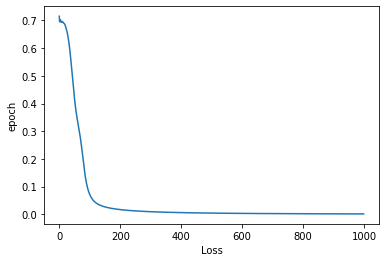

In [52]:
plt.plot(range(epochs), losses)
plt.xlabel('Loss')
plt.ylabel('epoch')

In [59]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)


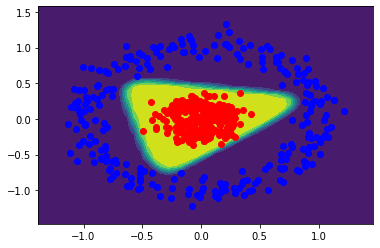

In [60]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


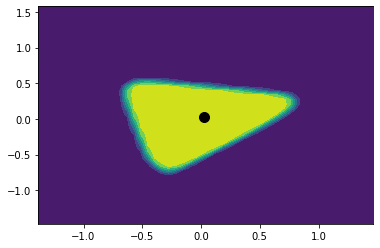

In [62]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = "black")
print("Prediction is", prediction)
plot_decision_boundary(X, y)